# Use ML to predict living time

In [41]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Preprocess the data

In [67]:
data_raw = pd.read_excel('../output/table_ready_espresso_2020.xlsx', index_col = 0)

# remove NA rows
data_nadrop = data_raw.dropna()

# extract x and y
data_x = data_nadrop.iloc[:, 10:]

products = ["espresso shot", "Dagens kaffe", "Latte", "SKOLEBOLLE", "KANELBOLLE", "Cappucino", "Senterkaffe", "AVOTOAST", "RAW CAKE", "JUICE"]
msrs_origin = list()
for i in range(10):
    product = products[i]
    
    data_y = data_nadrop.iloc[:, i]

    test_date = ['06.02.2020', '07.02.2020', '08.02.2020', '10.02.2020', '11.02.2020', '12.02.2020', '13.02.2020', '14.02.2020', '15.02.2020', '17.02.2020', '18.02.2020', '19.02.2020', '20.02.2020', '21.02.2020']

    x_test = data_x.loc[test_date, :]
    y_test = data_y.loc[test_date]

    x_train = data_x.loc[np.setdiff1d(data_x.index, test_date).tolist(), :]
    y_train = data_y.loc[np.setdiff1d(data_y.index, test_date).tolist()]

    svr = SVR(C=1.0, epsilon=0.2)
    svr.fit(x_train, y_train)
    prediction = svr.predict(x_test)
    
    msr_origin = mean_squared_error(y_test, prediction)
    msrs_origin.append(msr_origin)
    
#    print('Real: ' + str(y_test))
#    print('Prediction: ' + str(prediction))
    print('Mean squared error for ' + product + ' is: ' + str(mean_squared_error(y_test, prediction)))

Mean squared error for espresso shot is: 127.24847745974171
Mean squared error for Dagens kaffe is: 258.9243477070104
Mean squared error for Latte is: 48.94784310869854
Mean squared error for SKOLEBOLLE is: 247.9907285385835
Mean squared error for KANELBOLLE is: 398.91803742276994
Mean squared error for Cappucino is: 42.09362302867722
Mean squared error for Senterkaffe is: 32.11102426034277
Mean squared error for AVOTOAST is: 43.7041418977924
Mean squared error for RAW CAKE is: 146.63346004677265
Mean squared error for JUICE is: 32.19090835693575


In [68]:
data_raw = pd.read_excel('../output/table_ready_espresso_2020.xlsx', index_col = 0)

# remove NA rows
data_nadrop = data_raw.dropna()

# extract x and y
data_x = data_nadrop.iloc[:, 10:]
dates = data_x.index.values
dayofweek = pd.to_datetime(data_x.index.values, format = '%d.%m.%Y').dayofweek
# data_x['dayOfWeek'] = dayofweek

weekends = list()
for i in range(len(dayofweek)):
    if dayofweek[i] < 5:
        weekends.append(0)
    else:
        weekends.append(1)
data_x['weekends'] = weekends

products = ["espresso shot", "Dagens kaffe", "Latte", "SKOLEBOLLE", "KANELBOLLE", "Cappucino", "Senterkaffe", "AVOTOAST", "RAW CAKE", "JUICE"]
msrs = list()
for i in range(10):
    product = products[i]
    
    data_y = data_nadrop.iloc[:, i]

    test_date = ['06.02.2020', '07.02.2020', '08.02.2020', '10.02.2020', '11.02.2020', '12.02.2020', '13.02.2020', '14.02.2020', '15.02.2020', '17.02.2020', '18.02.2020', '19.02.2020', '20.02.2020', '21.02.2020']

    x_test = data_x.loc[test_date, :]
    y_test = data_y.loc[test_date]

    x_train = data_x.loc[np.setdiff1d(data_x.index, test_date).tolist(), :]
    y_train = data_y.loc[np.setdiff1d(data_y.index, test_date).tolist()]

    svr = SVR(C=1.0, epsilon=0.2)
    svr.fit(x_train, y_train)
    prediction = svr.predict(x_test)
    msr = mean_squared_error(y_test, prediction)
    msrs.append(msr)
#    print('Real: ' + str(y_test))
#    print('Prediction: ' + str(prediction))
    print('Mean squared error for ' + product + ' is: ' + str(msr))

Mean squared error for espresso shot is: 126.8608116306916
Mean squared error for Dagens kaffe is: 258.5914117408338
Mean squared error for Latte is: 48.712315536284834
Mean squared error for SKOLEBOLLE is: 246.7808734793221
Mean squared error for KANELBOLLE is: 395.80364598198105
Mean squared error for Cappucino is: 41.72165084445063
Mean squared error for Senterkaffe is: 32.155801209038884
Mean squared error for AVOTOAST is: 43.78907931296584
Mean squared error for RAW CAKE is: 149.93634040291144
Mean squared error for JUICE is: 32.06656939317411


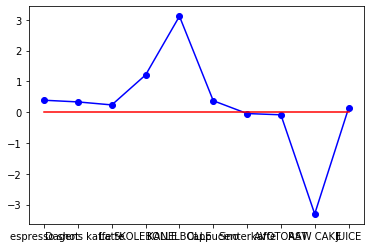

In [70]:
plt.plot(products, [i-j for (i,j) in zip(msrs_origin, msrs)], marker='o', color = 'b')
plt.plot(products, np.repeat(0, 10), color = 'r')